In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
#n_units=64
#n_units=128
#n_units=256
n_units=512
#n_units=1024

In [4]:
os.chdir('E:\\MLdataset')

In [5]:
x_csv = pd.read_csv('x_120_10degree.csv',header=None)

In [6]:
x_5degree = x_csv.to_numpy(dtype='float32')

In [7]:
x = x_5degree[:, 0:15]

In [8]:
x = x.reshape((13*6, n_sensors, 1))

In [9]:
y_5degree = pd.read_csv('y_output(120_10deg).csv',header=None)

In [10]:
os.chdir('C:\\Users\\User')

In [11]:
y_5degree = y_5degree.to_numpy(dtype='float32')

In [12]:
y = y_5degree.reshape((13*6, 100, 100))

In [13]:
tsr = x_5degree[:, -2]

In [14]:
theta = x_5degree[:, -1]

In [15]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.1,
                                                                                                 random_state=42)

In [16]:
print(y_train.shape)

(70, 100, 100)


In [17]:
print(y_test.shape)

(8, 100, 100)


In [18]:
print(x_train.shape)

(70, 15, 1)


In [19]:
print(x_test.shape)

(8, 15, 1)


In [20]:
theta_train.shape

(70,)

In [21]:
tsr_train.shape

(70,)

In [22]:
os.chdir('C:\\Users\\User')

In [23]:
input_time = tf.keras.Input(shape=(2, 1))
reshape = tf.keras.layers.Reshape((2,))(input_time)

x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='firstHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='secondHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='thirdHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='fourthHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayerSensor')(x_)
output_image = tf.keras.layers.Reshape((100,100))(output_data)
# MLP
sd = tf.keras.Model(input_time, output_image)

In [24]:
sd.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2, 1)]            0         
                                                                 
 reshape (Reshape)           (None, 2)                 0         
                                                                 
 firstHiddenLayerSensor (Den  (None, 512)              1536      
 se)                                                             
                                                                 
 secondHiddenLayerSensor (De  (None, 512)              262656    
 nse)                                                            
                                                                 
 thirdHiddenLayerSensor (Den  (None, 512)              262656    
 se)                                                             
                                                             

In [25]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
           loss = tf.keras.losses.MeanSquaredError(),
           metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [26]:
theta_train_nor = theta_train / 360
theta_test_nor = theta_test / 360

In [27]:
tsr_theta_train = np.hstack((tsr_train.reshape((-1,1)), theta_train_nor.reshape((-1,1)))).reshape((70, 2, 1))
tsr_theta_test = np.hstack((tsr_test.reshape((-1,1)), theta_test_nor.reshape((-1,1)))).reshape((8, 2, 1))

In [28]:
tsr_theta_train.shape

(70, 2, 1)

In [29]:
start = datetime.datetime.now()
history = sd.fit(tsr_theta_train, y_train, epochs=10000, shuffle=True, batch_size=40)
end = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 1s 8ms/step - loss: 0.0113 - rmse: 0.1057
Epoch 2/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0113 - rmse: 0.1054
Epoch 3/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0112 - rmse: 0.1050
Epoch 4/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0111 - rmse: 0.1047
Epoch 5/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0111 - rmse: 0.1044
Epoch 6/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0110 - rmse: 0.1041
Epoch 7/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0109 - rmse: 0.1037
Epoch 8/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0108 - rmse: 0.1033
Epoch 9/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0107 - rmse: 0.1027
Epoch 10/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0106 - rmse: 0.1021
Epoch 11/10000
2/2 [=============================

2/2 [==============================] - 0s 6ms/step - loss: 0.0071 - rmse: 0.0834
Epoch 87/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0071 - rmse: 0.0834
Epoch 88/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0071 - rmse: 0.0834
Epoch 89/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0071 - rmse: 0.0834
Epoch 90/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0071 - rmse: 0.0834
Epoch 91/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0071 - rmse: 0.0834
Epoch 92/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0071 - rmse: 0.0834
Epoch 93/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0071 - rmse: 0.0834
Epoch 94/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0071 - rmse: 0.0834
Epoch 95/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0071 - rmse: 0.0834
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 5ms/step - loss: 0.0070 - rmse: 0.0829
Epoch 171/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0070 - rmse: 0.0829
Epoch 172/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0070 - rmse: 0.0829
Epoch 173/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0070 - rmse: 0.0828
Epoch 174/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0070 - rmse: 0.0828
Epoch 175/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0070 - rmse: 0.0828
Epoch 176/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0070 - rmse: 0.0828
Epoch 177/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0070 - rmse: 0.0827
Epoch 178/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0070 - rmse: 0.0827
Epoch 179/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0070 - rmse: 0.0827
Epoch 180/10000
2/2 [=========================

2/2 [==============================] - 0s 7ms/step - loss: 0.0067 - rmse: 0.0811
Epoch 255/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0810
Epoch 256/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0810
Epoch 257/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0067 - rmse: 0.0810
Epoch 258/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0067 - rmse: 0.0810
Epoch 259/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0067 - rmse: 0.0810
Epoch 260/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0067 - rmse: 0.0810
Epoch 261/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0067 - rmse: 0.0810
Epoch 262/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0810
Epoch 263/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0067 - rmse: 0.0810
Epoch 264/10000
2/2 [=========================

2/2 [==============================] - 0s 8ms/step - loss: 0.0064 - rmse: 0.0793
Epoch 339/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0793
Epoch 340/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0064 - rmse: 0.0792
Epoch 341/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0792
Epoch 342/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0064 - rmse: 0.0792
Epoch 343/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0064 - rmse: 0.0791
Epoch 344/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0791
Epoch 345/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0791
Epoch 346/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0064 - rmse: 0.0790
Epoch 347/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0064 - rmse: 0.0790
Epoch 348/10000
2/2 [=========================

2/2 [==============================] - 0s 6ms/step - loss: 0.0059 - rmse: 0.0762
Epoch 423/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0059 - rmse: 0.0761
Epoch 424/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0059 - rmse: 0.0760
Epoch 425/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0759
Epoch 426/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0759
Epoch 427/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0758
Epoch 428/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0059 - rmse: 0.0758
Epoch 429/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0059 - rmse: 0.0758
Epoch 430/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0757
Epoch 431/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0059 - rmse: 0.0757
Epoch 432/10000
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 0.0053 - rmse: 0.0718
Epoch 507/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0053 - rmse: 0.0718
Epoch 508/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0053 - rmse: 0.0717
Epoch 509/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0053 - rmse: 0.0717
Epoch 510/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0053 - rmse: 0.0717
Epoch 511/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0053 - rmse: 0.0717
Epoch 512/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0053 - rmse: 0.0716
Epoch 513/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0053 - rmse: 0.0716
Epoch 514/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0053 - rmse: 0.0716
Epoch 515/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0053 - rmse: 0.0716
Epoch 516/10000
2/2 [=========================

2/2 [==============================] - 0s 6ms/step - loss: 0.0049 - rmse: 0.0687
Epoch 591/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0048 - rmse: 0.0687
Epoch 592/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0048 - rmse: 0.0685
Epoch 593/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0048 - rmse: 0.0685
Epoch 594/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0048 - rmse: 0.0684
Epoch 595/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0048 - rmse: 0.0684
Epoch 596/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0048 - rmse: 0.0685
Epoch 597/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0048 - rmse: 0.0683
Epoch 598/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0048 - rmse: 0.0683
Epoch 599/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0048 - rmse: 0.0683
Epoch 600/10000
2/2 [=========================

2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0637
Epoch 675/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0637
Epoch 676/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0638
Epoch 677/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0637
Epoch 678/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0635
Epoch 679/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0635
Epoch 680/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0041 - rmse: 0.0634
Epoch 681/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0041 - rmse: 0.0633
Epoch 682/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0041 - rmse: 0.0632
Epoch 683/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0041 - rmse: 0.0631
Epoch 684/10000
2/2 [=========================

2/2 [==============================] - 0s 6ms/step - loss: 0.0034 - rmse: 0.0569
Epoch 759/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0567
Epoch 760/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0034 - rmse: 0.0568
Epoch 761/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0566
Epoch 762/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0033 - rmse: 0.0566
Epoch 763/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0033 - rmse: 0.0566
Epoch 764/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0565
Epoch 765/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0565
Epoch 766/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0568
Epoch 767/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0034 - rmse: 0.0571
Epoch 768/10000
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0515
Epoch 843/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0516
Epoch 844/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0509
Epoch 845/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0506
Epoch 846/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0505
Epoch 847/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0502
Epoch 848/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0504
Epoch 849/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0503
Epoch 850/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0502
Epoch 851/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0501
Epoch 852/10000
2/2 [=========================

2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0449
Epoch 927/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0447
Epoch 928/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0449
Epoch 929/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0448
Epoch 930/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0446
Epoch 931/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0445
Epoch 932/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0445
Epoch 933/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0444
Epoch 934/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0442
Epoch 935/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0441
Epoch 936/10000
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0393
Epoch 1011/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0391
Epoch 1012/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0390
Epoch 1013/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0390
Epoch 1014/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0389
Epoch 1015/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0389
Epoch 1016/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0388
Epoch 1017/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0388
Epoch 1018/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0387
Epoch 1019/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0388
Epoch 1020/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0350
Epoch 1094/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0350
Epoch 1095/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0350
Epoch 1096/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0348
Epoch 1097/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0346
Epoch 1098/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0345
Epoch 1099/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0345
Epoch 1100/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0345
Epoch 1101/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0346
Epoch 1102/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0345
Epoch 1103/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0315
Epoch 1177/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0316
Epoch 1178/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0314
Epoch 1179/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0315
Epoch 1180/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0313
Epoch 1181/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0313
Epoch 1182/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0312
Epoch 1183/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0310
Epoch 1184/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0310
Epoch 1185/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0310
Epoch 1186/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 9.2581e-04 - rmse: 0.0285
Epoch 1259/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.2373e-04 - rmse: 0.0285
Epoch 1260/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.2074e-04 - rmse: 0.0284
Epoch 1261/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.2043e-04 - rmse: 0.0284
Epoch 1262/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.1591e-04 - rmse: 0.0283
Epoch 1263/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.1564e-04 - rmse: 0.0283
Epoch 1264/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.1402e-04 - rmse: 0.0283
Epoch 1265/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.0854e-04 - rmse: 0.0282
Epoch 1266/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.0921e-04 - rmse: 0.0282
Epoch 1267/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.0977e-04 - rmse: 0.02

2/2 [==============================] - 0s 6ms/step - loss: 7.9851e-04 - rmse: 0.0262
Epoch 1339/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.9235e-04 - rmse: 0.0261
Epoch 1340/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.8811e-04 - rmse: 0.0260
Epoch 1341/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.8456e-04 - rmse: 0.0259
Epoch 1342/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.8472e-04 - rmse: 0.0259
Epoch 1343/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.8174e-04 - rmse: 0.0259
Epoch 1344/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.7843e-04 - rmse: 0.0258
Epoch 1345/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.7676e-04 - rmse: 0.0258
Epoch 1346/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.7955e-04 - rmse: 0.0258
Epoch 1347/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.7844e-04 - rmse: 0.02

2/2 [==============================] - 0s 6ms/step - loss: 6.7444e-04 - rmse: 0.0238
Epoch 1419/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.7016e-04 - rmse: 0.0237
Epoch 1420/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.7151e-04 - rmse: 0.0237
Epoch 1421/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.6821e-04 - rmse: 0.0236
Epoch 1422/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.6724e-04 - rmse: 0.0236
Epoch 1423/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.6697e-04 - rmse: 0.0236
Epoch 1424/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.6471e-04 - rmse: 0.0235
Epoch 1425/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.6385e-04 - rmse: 0.0235
Epoch 1426/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.6107e-04 - rmse: 0.0235
Epoch 1427/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.6101e-04 - rmse: 0.02

2/2 [==============================] - 0s 6ms/step - loss: 5.7330e-04 - rmse: 0.0216
Epoch 1499/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7283e-04 - rmse: 0.0215
Epoch 1500/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.7174e-04 - rmse: 0.0215
Epoch 1501/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7185e-04 - rmse: 0.0215
Epoch 1502/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7087e-04 - rmse: 0.0215
Epoch 1503/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7214e-04 - rmse: 0.0215
Epoch 1504/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7144e-04 - rmse: 0.0215
Epoch 1505/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7030e-04 - rmse: 0.0215
Epoch 1506/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.6541e-04 - rmse: 0.0214
Epoch 1507/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.6674e-04 - rmse: 0.02

2/2 [==============================] - 0s 7ms/step - loss: 4.9084e-04 - rmse: 0.0196
Epoch 1579/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.9029e-04 - rmse: 0.0196
Epoch 1580/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.9057e-04 - rmse: 0.0196
Epoch 1581/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.8824e-04 - rmse: 0.0195
Epoch 1582/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.8835e-04 - rmse: 0.0195
Epoch 1583/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.8721e-04 - rmse: 0.0195
Epoch 1584/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.8514e-04 - rmse: 0.0195
Epoch 1585/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.8531e-04 - rmse: 0.0195
Epoch 1586/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.8517e-04 - rmse: 0.0195
Epoch 1587/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.8341e-04 - rmse: 0.01

2/2 [==============================] - 0s 5ms/step - loss: 4.2254e-04 - rmse: 0.0178
Epoch 1659/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.2352e-04 - rmse: 0.0178
Epoch 1660/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.2152e-04 - rmse: 0.0178
Epoch 1661/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.2068e-04 - rmse: 0.0178
Epoch 1662/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.2080e-04 - rmse: 0.0178
Epoch 1663/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.1927e-04 - rmse: 0.0177
Epoch 1664/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.2094e-04 - rmse: 0.0178
Epoch 1665/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.1795e-04 - rmse: 0.0177
Epoch 1666/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.1834e-04 - rmse: 0.0177
Epoch 1667/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.1660e-04 - rmse: 0.01

2/2 [==============================] - 0s 6ms/step - loss: 3.6564e-04 - rmse: 0.0162
Epoch 1739/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.6540e-04 - rmse: 0.0162
Epoch 1740/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.6422e-04 - rmse: 0.0161
Epoch 1741/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.6453e-04 - rmse: 0.0162
Epoch 1742/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.6492e-04 - rmse: 0.0162
Epoch 1743/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.6518e-04 - rmse: 0.0162
Epoch 1744/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.6150e-04 - rmse: 0.0161
Epoch 1745/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.6239e-04 - rmse: 0.0161
Epoch 1746/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.6098e-04 - rmse: 0.0160
Epoch 1747/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.5968e-04 - rmse: 0.01

2/2 [==============================] - 0s 6ms/step - loss: 3.2237e-04 - rmse: 0.0148
Epoch 1819/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.2299e-04 - rmse: 0.0149
Epoch 1820/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.2846e-04 - rmse: 0.0151
Epoch 1821/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.2462e-04 - rmse: 0.0149
Epoch 1822/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.2177e-04 - rmse: 0.0148
Epoch 1823/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.2387e-04 - rmse: 0.0149
Epoch 1824/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.2249e-04 - rmse: 0.0149
Epoch 1825/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.2462e-04 - rmse: 0.0149
Epoch 1826/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.2445e-04 - rmse: 0.0149
Epoch 1827/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.2398e-04 - rmse: 0.01

2/2 [==============================] - 0s 7ms/step - loss: 2.8463e-04 - rmse: 0.0136
Epoch 1899/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.8532e-04 - rmse: 0.0136
Epoch 1900/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8411e-04 - rmse: 0.0136
Epoch 1901/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.8527e-04 - rmse: 0.0136
Epoch 1902/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.8500e-04 - rmse: 0.0136
Epoch 1903/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.8331e-04 - rmse: 0.0135
Epoch 1904/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.8156e-04 - rmse: 0.0135
Epoch 1905/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8056e-04 - rmse: 0.0134
Epoch 1906/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.7892e-04 - rmse: 0.0134
Epoch 1907/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8084e-04 - rmse: 0.01

2/2 [==============================] - 0s 5ms/step - loss: 2.5321e-04 - rmse: 0.0124
Epoch 1979/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.5170e-04 - rmse: 0.0124
Epoch 1980/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5203e-04 - rmse: 0.0124
Epoch 1981/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.5156e-04 - rmse: 0.0124
Epoch 1982/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.5330e-04 - rmse: 0.0124
Epoch 1983/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.5625e-04 - rmse: 0.0125
Epoch 1984/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5134e-04 - rmse: 0.0124
Epoch 1985/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5115e-04 - rmse: 0.0123
Epoch 1986/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.5183e-04 - rmse: 0.0124
Epoch 1987/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5452e-04 - rmse: 0.01

2/2 [==============================] - 0s 6ms/step - loss: 2.2724e-04 - rmse: 0.0114
Epoch 2059/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2658e-04 - rmse: 0.0114
Epoch 2060/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.2685e-04 - rmse: 0.0114
Epoch 2061/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.2641e-04 - rmse: 0.0114
Epoch 2062/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2844e-04 - rmse: 0.0115
Epoch 2063/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2729e-04 - rmse: 0.0114
Epoch 2064/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.2570e-04 - rmse: 0.0113
Epoch 2065/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.2559e-04 - rmse: 0.0113
Epoch 2066/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2626e-04 - rmse: 0.0114
Epoch 2067/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.2624e-04 - rmse: 0.01

2/2 [==============================] - 0s 6ms/step - loss: 2.0888e-04 - rmse: 0.0106
Epoch 2139/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.0756e-04 - rmse: 0.0106
Epoch 2140/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.0610e-04 - rmse: 0.0105
Epoch 2141/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.0682e-04 - rmse: 0.0105
Epoch 2142/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.0687e-04 - rmse: 0.0105
Epoch 2143/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.0572e-04 - rmse: 0.0105
Epoch 2144/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.0616e-04 - rmse: 0.0105
Epoch 2145/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.0749e-04 - rmse: 0.0106
Epoch 2146/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.0700e-04 - rmse: 0.0105
Epoch 2147/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.0922e-04 - rmse: 0.01

2/2 [==============================] - 0s 5ms/step - loss: 1.9192e-04 - rmse: 0.0099
Epoch 2219/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.9025e-04 - rmse: 0.0098
Epoch 2220/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.9039e-04 - rmse: 0.0098
Epoch 2221/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.9047e-04 - rmse: 0.0098
Epoch 2222/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.8968e-04 - rmse: 0.0098
Epoch 2223/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.9000e-04 - rmse: 0.0098
Epoch 2224/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.8964e-04 - rmse: 0.0098
Epoch 2225/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.8892e-04 - rmse: 0.0097
Epoch 2226/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.8929e-04 - rmse: 0.0097
Epoch 2227/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.8828e-04 - rmse: 0.00

2/2 [==============================] - 0s 8ms/step - loss: 1.7793e-04 - rmse: 0.0092
Epoch 2299/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.7937e-04 - rmse: 0.0093
Epoch 2300/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.8078e-04 - rmse: 0.0094
Epoch 2301/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.7784e-04 - rmse: 0.0092
Epoch 2302/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.7688e-04 - rmse: 0.0092
Epoch 2303/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.7566e-04 - rmse: 0.0091
Epoch 2304/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.7558e-04 - rmse: 0.0091
Epoch 2305/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.7562e-04 - rmse: 0.0091
Epoch 2306/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.7548e-04 - rmse: 0.0091
Epoch 2307/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.7470e-04 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 1.7708e-04 - rmse: 0.0092
Epoch 2379/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.7407e-04 - rmse: 0.0091
Epoch 2380/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.7534e-04 - rmse: 0.0091
Epoch 2381/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.7104e-04 - rmse: 0.0089
Epoch 2382/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6875e-04 - rmse: 0.0088
Epoch 2383/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6774e-04 - rmse: 0.0087
Epoch 2384/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6713e-04 - rmse: 0.0087
Epoch 2385/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.6733e-04 - rmse: 0.0087
Epoch 2386/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6904e-04 - rmse: 0.0088
Epoch 2387/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.6928e-04 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 1.5648e-04 - rmse: 0.0081
Epoch 2459/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.5594e-04 - rmse: 0.0081
Epoch 2460/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.5590e-04 - rmse: 0.0081
Epoch 2461/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.5571e-04 - rmse: 0.0081
Epoch 2462/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.5619e-04 - rmse: 0.0081
Epoch 2463/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.5744e-04 - rmse: 0.0082
Epoch 2464/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.5572e-04 - rmse: 0.0081
Epoch 2465/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.5632e-04 - rmse: 0.0081
Epoch 2466/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.5515e-04 - rmse: 0.0081
Epoch 2467/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.5535e-04 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 1.4908e-04 - rmse: 0.0077
Epoch 2539/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.4882e-04 - rmse: 0.0077
Epoch 2540/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4909e-04 - rmse: 0.0077
Epoch 2541/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.5021e-04 - rmse: 0.0078
Epoch 2542/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.5008e-04 - rmse: 0.0078
Epoch 2543/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.5003e-04 - rmse: 0.0078
Epoch 2544/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.5009e-04 - rmse: 0.0078
Epoch 2545/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.5473e-04 - rmse: 0.0081
Epoch 2546/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.5781e-04 - rmse: 0.0083
Epoch 2547/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.5140e-04 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 1.4085e-04 - rmse: 0.0073
Epoch 2619/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.4234e-04 - rmse: 0.0074
Epoch 2620/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.4088e-04 - rmse: 0.0073
Epoch 2621/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4040e-04 - rmse: 0.0072
Epoch 2622/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4056e-04 - rmse: 0.0073
Epoch 2623/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4246e-04 - rmse: 0.0074
Epoch 2624/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.4120e-04 - rmse: 0.0073
Epoch 2625/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.4093e-04 - rmse: 0.0073
Epoch 2626/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4338e-04 - rmse: 0.0075
Epoch 2627/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4198e-04 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 1.3597e-04 - rmse: 0.0070
Epoch 2699/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.3567e-04 - rmse: 0.0070
Epoch 2700/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3490e-04 - rmse: 0.0069
Epoch 2701/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3443e-04 - rmse: 0.0069
Epoch 2702/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.3418e-04 - rmse: 0.0069
Epoch 2703/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3414e-04 - rmse: 0.0069
Epoch 2704/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3415e-04 - rmse: 0.0069
Epoch 2705/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3397e-04 - rmse: 0.0069
Epoch 2706/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.3442e-04 - rmse: 0.0069
Epoch 2707/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3374e-04 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 1.2925e-04 - rmse: 0.0066
Epoch 2779/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2902e-04 - rmse: 0.0066
Epoch 2780/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2869e-04 - rmse: 0.0066
Epoch 2781/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2907e-04 - rmse: 0.0066
Epoch 2782/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2882e-04 - rmse: 0.0066
Epoch 2783/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2838e-04 - rmse: 0.0066
Epoch 2784/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2927e-04 - rmse: 0.0066
Epoch 2785/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2869e-04 - rmse: 0.0066
Epoch 2786/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2830e-04 - rmse: 0.0065
Epoch 2787/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2839e-04 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 1.2570e-04 - rmse: 0.0064
Epoch 2859/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2500e-04 - rmse: 0.0064
Epoch 2860/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2481e-04 - rmse: 0.0064
Epoch 2861/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2580e-04 - rmse: 0.0064
Epoch 2862/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2495e-04 - rmse: 0.0064
Epoch 2863/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2458e-04 - rmse: 0.0063
Epoch 2864/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2461e-04 - rmse: 0.0063
Epoch 2865/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2387e-04 - rmse: 0.0063
Epoch 2866/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2404e-04 - rmse: 0.0063
Epoch 2867/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2423e-04 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 1.2045e-04 - rmse: 0.0061
Epoch 2939/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2119e-04 - rmse: 0.0062
Epoch 2940/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2102e-04 - rmse: 0.0061
Epoch 2941/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2067e-04 - rmse: 0.0061
Epoch 2942/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2037e-04 - rmse: 0.0061
Epoch 2943/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2047e-04 - rmse: 0.0061
Epoch 2944/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2004e-04 - rmse: 0.0061
Epoch 2945/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2083e-04 - rmse: 0.0061
Epoch 2946/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2006e-04 - rmse: 0.0061
Epoch 2947/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2106e-04 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 1.1699e-04 - rmse: 0.0059
Epoch 3019/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1721e-04 - rmse: 0.0059
Epoch 3020/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1725e-04 - rmse: 0.0059
Epoch 3021/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1705e-04 - rmse: 0.0059
Epoch 3022/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1674e-04 - rmse: 0.0059
Epoch 3023/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1668e-04 - rmse: 0.0059
Epoch 3024/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1710e-04 - rmse: 0.0059
Epoch 3025/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1671e-04 - rmse: 0.0059
Epoch 3026/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1644e-04 - rmse: 0.0059
Epoch 3027/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1682e-04 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 1.1294e-04 - rmse: 0.0056
Epoch 3099/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1307e-04 - rmse: 0.0056
Epoch 3100/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1314e-04 - rmse: 0.0056
Epoch 3101/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1271e-04 - rmse: 0.0056
Epoch 3102/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1275e-04 - rmse: 0.0056
Epoch 3103/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1271e-04 - rmse: 0.0056
Epoch 3104/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1254e-04 - rmse: 0.0056
Epoch 3105/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1245e-04 - rmse: 0.0056
Epoch 3106/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1235e-04 - rmse: 0.0056
Epoch 3107/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1296e-04 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 1.1076e-04 - rmse: 0.0055
Epoch 3179/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1043e-04 - rmse: 0.0055
Epoch 3180/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1365e-04 - rmse: 0.0058
Epoch 3181/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1095e-04 - rmse: 0.0055
Epoch 3182/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1326e-04 - rmse: 0.0057
Epoch 3183/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1246e-04 - rmse: 0.0057
Epoch 3184/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1225e-04 - rmse: 0.0057
Epoch 3185/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1305e-04 - rmse: 0.0057
Epoch 3186/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1266e-04 - rmse: 0.0057
Epoch 3187/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1083e-04 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 1.1031e-04 - rmse: 0.0056
Epoch 3259/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1009e-04 - rmse: 0.0055
Epoch 3260/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0829e-04 - rmse: 0.0054
Epoch 3261/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0824e-04 - rmse: 0.0054
Epoch 3262/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0846e-04 - rmse: 0.0054
Epoch 3263/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0788e-04 - rmse: 0.0053
Epoch 3264/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0749e-04 - rmse: 0.0053
Epoch 3265/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0761e-04 - rmse: 0.0053
Epoch 3266/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0698e-04 - rmse: 0.0053
Epoch 3267/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0714e-04 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 1.0882e-04 - rmse: 0.0055
Epoch 3339/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0840e-04 - rmse: 0.0055
Epoch 3340/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0810e-04 - rmse: 0.0054
Epoch 3341/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0871e-04 - rmse: 0.0055
Epoch 3342/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0672e-04 - rmse: 0.0053
Epoch 3343/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1174e-04 - rmse: 0.0058
Epoch 3344/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0761e-04 - rmse: 0.0054
Epoch 3345/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0945e-04 - rmse: 0.0056
Epoch 3346/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1060e-04 - rmse: 0.0057
Epoch 3347/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1006e-04 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 1.0209e-04 - rmse: 0.0050
Epoch 3419/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0251e-04 - rmse: 0.0050
Epoch 3420/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0211e-04 - rmse: 0.0050
Epoch 3421/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0211e-04 - rmse: 0.0050
Epoch 3422/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0265e-04 - rmse: 0.0050
Epoch 3423/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0304e-04 - rmse: 0.0051
Epoch 3424/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0246e-04 - rmse: 0.0050
Epoch 3425/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0273e-04 - rmse: 0.0050
Epoch 3426/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0254e-04 - rmse: 0.0050
Epoch 3427/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0214e-04 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 1.0014e-04 - rmse: 0.0048
Epoch 3499/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0088e-04 - rmse: 0.0049
Epoch 3500/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0045e-04 - rmse: 0.0049
Epoch 3501/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0056e-04 - rmse: 0.0049
Epoch 3502/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0064e-04 - rmse: 0.0049
Epoch 3503/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0025e-04 - rmse: 0.0049
Epoch 3504/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0003e-04 - rmse: 0.0048
Epoch 3505/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0018e-04 - rmse: 0.0049
Epoch 3506/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.9916e-05 - rmse: 0.0048
Epoch 3507/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.9539e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 1.0403e-04 - rmse: 0.0053
Epoch 3579/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0068e-04 - rmse: 0.0050
Epoch 3580/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0298e-04 - rmse: 0.0052
Epoch 3581/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0130e-04 - rmse: 0.0050
Epoch 3582/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0294e-04 - rmse: 0.0052
Epoch 3583/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0437e-04 - rmse: 0.0053
Epoch 3584/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0237e-04 - rmse: 0.0052
Epoch 3585/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0763e-04 - rmse: 0.0056
Epoch 3586/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0824e-04 - rmse: 0.0057
Epoch 3587/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1388e-04 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 9.8637e-05 - rmse: 0.0048
Epoch 3659/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.9286e-05 - rmse: 0.0049
Epoch 3660/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.8434e-05 - rmse: 0.0048
Epoch 3661/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.8783e-05 - rmse: 0.0049
Epoch 3662/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.9092e-05 - rmse: 0.0049
Epoch 3663/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.9330e-05 - rmse: 0.0049
Epoch 3664/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.7865e-05 - rmse: 0.0048
Epoch 3665/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.7508e-05 - rmse: 0.0047
Epoch 3666/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.7236e-05 - rmse: 0.0047
Epoch 3667/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.6975e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 9.4108e-05 - rmse: 0.0044
Epoch 3739/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.4174e-05 - rmse: 0.0044
Epoch 3740/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.4108e-05 - rmse: 0.0044
Epoch 3741/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.4145e-05 - rmse: 0.0044
Epoch 3742/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.3970e-05 - rmse: 0.0044
Epoch 3743/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.4042e-05 - rmse: 0.0044
Epoch 3744/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.4087e-05 - rmse: 0.0044
Epoch 3745/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.3952e-05 - rmse: 0.0044
Epoch 3746/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.3866e-05 - rmse: 0.0044
Epoch 3747/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.3787e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 9.2732e-05 - rmse: 0.0044
Epoch 3819/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.2922e-05 - rmse: 0.0044
Epoch 3820/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.2700e-05 - rmse: 0.0044
Epoch 3821/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.2701e-05 - rmse: 0.0044
Epoch 3822/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.2504e-05 - rmse: 0.0043
Epoch 3823/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.2797e-05 - rmse: 0.0044
Epoch 3824/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.2471e-05 - rmse: 0.0043
Epoch 3825/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.2716e-05 - rmse: 0.0044
Epoch 3826/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.3109e-05 - rmse: 0.0044
Epoch 3827/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.2521e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 9.9222e-05 - rmse: 0.0051
Epoch 3899/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.5034e-05 - rmse: 0.0047
Epoch 3900/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.5995e-05 - rmse: 0.0048
Epoch 3901/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.6218e-05 - rmse: 0.0048
Epoch 3902/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.5930e-05 - rmse: 0.0048
Epoch 3903/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.4893e-05 - rmse: 0.0047
Epoch 3904/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.4210e-05 - rmse: 0.0046
Epoch 3905/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.6815e-05 - rmse: 0.0049
Epoch 3906/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0175e-04 - rmse: 0.0054
Epoch 3907/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.9172e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 8.9537e-05 - rmse: 0.0041
Epoch 3979/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.9993e-05 - rmse: 0.0042
Epoch 3980/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.9739e-05 - rmse: 0.0042
Epoch 3981/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.0289e-05 - rmse: 0.0042
Epoch 3982/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.0189e-05 - rmse: 0.0042
Epoch 3983/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.9628e-05 - rmse: 0.0042
Epoch 3984/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.0198e-05 - rmse: 0.0042
Epoch 3985/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.9915e-05 - rmse: 0.0042
Epoch 3986/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.9382e-05 - rmse: 0.0041
Epoch 3987/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.9501e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 9.1903e-05 - rmse: 0.0045
Epoch 4059/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.0878e-05 - rmse: 0.0044
Epoch 4060/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.0063e-05 - rmse: 0.0043
Epoch 4061/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.2582e-05 - rmse: 0.0046
Epoch 4062/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.1020e-05 - rmse: 0.0044
Epoch 4063/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.0074e-05 - rmse: 0.0043
Epoch 4064/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.1282e-05 - rmse: 0.0044
Epoch 4065/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.9476e-05 - rmse: 0.0042
Epoch 4066/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.9524e-05 - rmse: 0.0042
Epoch 4067/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.1076e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 9.1175e-05 - rmse: 0.0045
Epoch 4139/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.0736e-05 - rmse: 0.0044
Epoch 4140/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.3731e-05 - rmse: 0.0048
Epoch 4141/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.3381e-05 - rmse: 0.0047
Epoch 4142/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.3698e-05 - rmse: 0.0048
Epoch 4143/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.1959e-05 - rmse: 0.0046
Epoch 4144/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.6652e-05 - rmse: 0.0051
Epoch 4145/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0227e-04 - rmse: 0.0056
Epoch 4146/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2683e-04 - rmse: 0.0075
Epoch 4147/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0944e-04 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 8.5686e-05 - rmse: 0.0039
Epoch 4219/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.5664e-05 - rmse: 0.0039
Epoch 4220/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.5491e-05 - rmse: 0.0039
Epoch 4221/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.5718e-05 - rmse: 0.0039
Epoch 4222/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.5635e-05 - rmse: 0.0039
Epoch 4223/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.5701e-05 - rmse: 0.0039
Epoch 4224/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.5839e-05 - rmse: 0.0039
Epoch 4225/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.5626e-05 - rmse: 0.0039
Epoch 4226/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.5562e-05 - rmse: 0.0039
Epoch 4227/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.5533e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 8.5204e-05 - rmse: 0.0039
Epoch 4299/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.7154e-05 - rmse: 0.0042
Epoch 4300/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.5502e-05 - rmse: 0.0040
Epoch 4301/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.4952e-05 - rmse: 0.0039
Epoch 4302/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.4770e-05 - rmse: 0.0039
Epoch 4303/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.5652e-05 - rmse: 0.0040
Epoch 4304/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.6524e-05 - rmse: 0.0041
Epoch 4305/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.5985e-05 - rmse: 0.0040
Epoch 4306/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.6344e-05 - rmse: 0.0041
Epoch 4307/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.6392e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 8.4577e-05 - rmse: 0.0039
Epoch 4379/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.4265e-05 - rmse: 0.0039
Epoch 4380/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.4170e-05 - rmse: 0.0039
Epoch 4381/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.4319e-05 - rmse: 0.0039
Epoch 4382/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.4027e-05 - rmse: 0.0038
Epoch 4383/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.3915e-05 - rmse: 0.0038
Epoch 4384/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.3895e-05 - rmse: 0.0038
Epoch 4385/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.3628e-05 - rmse: 0.0038
Epoch 4386/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.3987e-05 - rmse: 0.0038
Epoch 4387/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.3727e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 8.2377e-05 - rmse: 0.0037
Epoch 4459/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.2457e-05 - rmse: 0.0037
Epoch 4460/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.2362e-05 - rmse: 0.0037
Epoch 4461/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.2414e-05 - rmse: 0.0037
Epoch 4462/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.2311e-05 - rmse: 0.0037
Epoch 4463/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.2417e-05 - rmse: 0.0037
Epoch 4464/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.2353e-05 - rmse: 0.0037
Epoch 4465/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.2266e-05 - rmse: 0.0037
Epoch 4466/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.2713e-05 - rmse: 0.0037
Epoch 4467/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.2320e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 8.2206e-05 - rmse: 0.0037
Epoch 4539/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.1747e-05 - rmse: 0.0037
Epoch 4540/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.1976e-05 - rmse: 0.0037
Epoch 4541/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.1593e-05 - rmse: 0.0037
Epoch 4542/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.4372e-05 - rmse: 0.0040
Epoch 4543/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.2161e-05 - rmse: 0.0037
Epoch 4544/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.3843e-05 - rmse: 0.0040
Epoch 4545/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.2431e-05 - rmse: 0.0038
Epoch 4546/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.4864e-05 - rmse: 0.0041
Epoch 4547/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.2044e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 8.0952e-05 - rmse: 0.0036
Epoch 4619/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.0685e-05 - rmse: 0.0036
Epoch 4620/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.0717e-05 - rmse: 0.0036
Epoch 4621/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.0538e-05 - rmse: 0.0036
Epoch 4622/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.0831e-05 - rmse: 0.0036
Epoch 4623/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.0468e-05 - rmse: 0.0036
Epoch 4624/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.0323e-05 - rmse: 0.0036
Epoch 4625/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.0225e-05 - rmse: 0.0035
Epoch 4626/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.0472e-05 - rmse: 0.0036
Epoch 4627/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.0441e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 8.2412e-05 - rmse: 0.0039
Epoch 4699/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.6483e-05 - rmse: 0.0044
Epoch 4700/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.2533e-05 - rmse: 0.0039
Epoch 4701/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.1825e-05 - rmse: 0.0038
Epoch 4702/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.4364e-05 - rmse: 0.0041
Epoch 4703/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.3083e-05 - rmse: 0.0040
Epoch 4704/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.6497e-05 - rmse: 0.0044
Epoch 4705/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.2098e-05 - rmse: 0.0039
Epoch 4706/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.2893e-05 - rmse: 0.0040
Epoch 4707/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.5184e-05 - rmse: 0.00

2/2 [==============================] - 0s 8ms/step - loss: 8.1499e-05 - rmse: 0.0038
Epoch 4779/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.0420e-05 - rmse: 0.0037
Epoch 4780/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.1352e-05 - rmse: 0.0038
Epoch 4781/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.9894e-05 - rmse: 0.0036
Epoch 4782/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.9705e-05 - rmse: 0.0036
Epoch 4783/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.1125e-05 - rmse: 0.0038
Epoch 4784/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.0550e-05 - rmse: 0.0037
Epoch 4785/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.0389e-05 - rmse: 0.0037
Epoch 4786/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.9529e-05 - rmse: 0.0036
Epoch 4787/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.9862e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 8.0055e-05 - rmse: 0.0037
Epoch 4859/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.8622e-05 - rmse: 0.0035
Epoch 4860/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.8924e-05 - rmse: 0.0036
Epoch 4861/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.8616e-05 - rmse: 0.0035
Epoch 4862/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.9534e-05 - rmse: 0.0037
Epoch 4863/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.8997e-05 - rmse: 0.0036
Epoch 4864/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.0910e-05 - rmse: 0.0038
Epoch 4865/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.8795e-05 - rmse: 0.0036
Epoch 4866/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.4323e-05 - rmse: 0.0043
Epoch 4867/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.5134e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 9.4317e-05 - rmse: 0.0053
Epoch 4939/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.1650e-05 - rmse: 0.0051
Epoch 4940/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.2051e-05 - rmse: 0.0040
Epoch 4941/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0051e-04 - rmse: 0.0059
Epoch 4942/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.5470e-05 - rmse: 0.0044
Epoch 4943/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.7194e-05 - rmse: 0.0056
Epoch 4944/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.4324e-05 - rmse: 0.0043
Epoch 4945/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.1483e-05 - rmse: 0.0051
Epoch 4946/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.7174e-05 - rmse: 0.0046
Epoch 4947/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.4795e-05 - rmse: 0.00

2/2 [==============================] - 0s 8ms/step - loss: 7.8884e-05 - rmse: 0.0037
Epoch 5019/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.8523e-05 - rmse: 0.0036
Epoch 5020/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.8434e-05 - rmse: 0.0036
Epoch 5021/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.8209e-05 - rmse: 0.0036
Epoch 5022/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.8442e-05 - rmse: 0.0036
Epoch 5023/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.8252e-05 - rmse: 0.0036
Epoch 5024/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.8695e-05 - rmse: 0.0037
Epoch 5025/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.0188e-05 - rmse: 0.0039
Epoch 5026/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.2404e-05 - rmse: 0.0041
Epoch 5027/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.2217e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 7.5392e-05 - rmse: 0.0032
Epoch 5099/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.5413e-05 - rmse: 0.0032
Epoch 5100/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.5411e-05 - rmse: 0.0032
Epoch 5101/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.5434e-05 - rmse: 0.0032
Epoch 5102/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.5303e-05 - rmse: 0.0032
Epoch 5103/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.5330e-05 - rmse: 0.0032
Epoch 5104/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.5281e-05 - rmse: 0.0032
Epoch 5105/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.5285e-05 - rmse: 0.0032
Epoch 5106/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.5291e-05 - rmse: 0.0032
Epoch 5107/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.5305e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 7.4925e-05 - rmse: 0.0032
Epoch 5179/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.4880e-05 - rmse: 0.0032
Epoch 5180/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.4937e-05 - rmse: 0.0032
Epoch 5181/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.4830e-05 - rmse: 0.0032
Epoch 5182/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.4781e-05 - rmse: 0.0032
Epoch 5183/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.4769e-05 - rmse: 0.0032
Epoch 5184/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.4928e-05 - rmse: 0.0032
Epoch 5185/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.4845e-05 - rmse: 0.0032
Epoch 5186/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.4686e-05 - rmse: 0.0032
Epoch 5187/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.4771e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 7.4207e-05 - rmse: 0.0032
Epoch 5259/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.4217e-05 - rmse: 0.0032
Epoch 5260/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.4054e-05 - rmse: 0.0031
Epoch 5261/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.4123e-05 - rmse: 0.0032
Epoch 5262/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.4097e-05 - rmse: 0.0031
Epoch 5263/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.4130e-05 - rmse: 0.0032
Epoch 5264/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.4012e-05 - rmse: 0.0031
Epoch 5265/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.4127e-05 - rmse: 0.0032
Epoch 5266/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.4027e-05 - rmse: 0.0031
Epoch 5267/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.4302e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 7.3776e-05 - rmse: 0.0032
Epoch 5339/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.3760e-05 - rmse: 0.0032
Epoch 5340/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.4244e-05 - rmse: 0.0032
Epoch 5341/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.3871e-05 - rmse: 0.0032
Epoch 5342/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.3905e-05 - rmse: 0.0032
Epoch 5343/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.4170e-05 - rmse: 0.0032
Epoch 5344/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.4459e-05 - rmse: 0.0033
Epoch 5345/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.4113e-05 - rmse: 0.0032
Epoch 5346/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.3971e-05 - rmse: 0.0032
Epoch 5347/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.4470e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 7.2899e-05 - rmse: 0.0031
Epoch 5419/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.2889e-05 - rmse: 0.0031
Epoch 5420/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.2919e-05 - rmse: 0.0031
Epoch 5421/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.2890e-05 - rmse: 0.0031
Epoch 5422/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.2930e-05 - rmse: 0.0031
Epoch 5423/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.2846e-05 - rmse: 0.0031
Epoch 5424/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.2975e-05 - rmse: 0.0031
Epoch 5425/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.2843e-05 - rmse: 0.0031
Epoch 5426/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.2885e-05 - rmse: 0.0031
Epoch 5427/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.3164e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 7.3890e-05 - rmse: 0.0033
Epoch 5499/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.5266e-05 - rmse: 0.0035
Epoch 5500/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.4427e-05 - rmse: 0.0034
Epoch 5501/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.4675e-05 - rmse: 0.0034
Epoch 5502/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.3944e-05 - rmse: 0.0033
Epoch 5503/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.3153e-05 - rmse: 0.0032
Epoch 5504/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.4187e-05 - rmse: 0.0033
Epoch 5505/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.4071e-05 - rmse: 0.0033
Epoch 5506/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.4043e-05 - rmse: 0.0033
Epoch 5507/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.4783e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 7.1980e-05 - rmse: 0.0030
Epoch 5579/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.1946e-05 - rmse: 0.0030
Epoch 5580/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.1715e-05 - rmse: 0.0030
Epoch 5581/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.1913e-05 - rmse: 0.0030
Epoch 5582/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.1825e-05 - rmse: 0.0030
Epoch 5583/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.1955e-05 - rmse: 0.0030
Epoch 5584/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.1845e-05 - rmse: 0.0030
Epoch 5585/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.1670e-05 - rmse: 0.0030
Epoch 5586/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.1679e-05 - rmse: 0.0030
Epoch 5587/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.1785e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 7.7260e-05 - rmse: 0.0039
Epoch 5659/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.7413e-05 - rmse: 0.0039
Epoch 5660/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.5240e-05 - rmse: 0.0036
Epoch 5661/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.5442e-05 - rmse: 0.0036
Epoch 5662/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0174e-04 - rmse: 0.0063
Epoch 5663/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.1467e-05 - rmse: 0.0044
Epoch 5664/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.4316e-05 - rmse: 0.0047
Epoch 5665/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.9433e-05 - rmse: 0.0052
Epoch 5666/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.1369e-05 - rmse: 0.0044
Epoch 5667/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.5955e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 7.3349e-05 - rmse: 0.0034
Epoch 5739/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.2779e-05 - rmse: 0.0033
Epoch 5740/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.2367e-05 - rmse: 0.0032
Epoch 5741/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.1951e-05 - rmse: 0.0032
Epoch 5742/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.2054e-05 - rmse: 0.0032
Epoch 5743/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.1862e-05 - rmse: 0.0031
Epoch 5744/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.2392e-05 - rmse: 0.0032
Epoch 5745/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.3610e-05 - rmse: 0.0034
Epoch 5746/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.2713e-05 - rmse: 0.0033
Epoch 5747/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.1562e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 7.6451e-05 - rmse: 0.0038
Epoch 5819/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.1999e-05 - rmse: 0.0032
Epoch 5820/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.5076e-05 - rmse: 0.0037
Epoch 5821/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.1880e-05 - rmse: 0.0032
Epoch 5822/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.1467e-05 - rmse: 0.0031
Epoch 5823/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.1052e-05 - rmse: 0.0031
Epoch 5824/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.1717e-05 - rmse: 0.0032
Epoch 5825/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.0880e-05 - rmse: 0.0030
Epoch 5826/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.0884e-05 - rmse: 0.0030
Epoch 5827/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.1558e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 7.2272e-05 - rmse: 0.0033
Epoch 5899/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.4064e-05 - rmse: 0.0036
Epoch 5900/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.6912e-05 - rmse: 0.0040
Epoch 5901/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.4613e-05 - rmse: 0.0036
Epoch 5902/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.7768e-05 - rmse: 0.0041
Epoch 5903/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.3699e-05 - rmse: 0.0035
Epoch 5904/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.2727e-05 - rmse: 0.0046
Epoch 5905/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.1932e-05 - rmse: 0.0033
Epoch 5906/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.1928e-05 - rmse: 0.0033
Epoch 5907/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.3299e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 7.0334e-05 - rmse: 0.0031
Epoch 5979/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.0086e-05 - rmse: 0.0030
Epoch 5980/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.9801e-05 - rmse: 0.0030
Epoch 5981/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.9527e-05 - rmse: 0.0029
Epoch 5982/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.9819e-05 - rmse: 0.0030
Epoch 5983/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.9761e-05 - rmse: 0.0030
Epoch 5984/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.9881e-05 - rmse: 0.0030
Epoch 5985/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.0465e-05 - rmse: 0.0031
Epoch 5986/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.9825e-05 - rmse: 0.0030
Epoch 5987/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.9792e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 7.1601e-05 - rmse: 0.0033
Epoch 6059/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.1499e-05 - rmse: 0.0033
Epoch 6060/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.2774e-05 - rmse: 0.0035
Epoch 6061/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.0774e-05 - rmse: 0.0032
Epoch 6062/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.6129e-05 - rmse: 0.0039
Epoch 6063/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.1819e-05 - rmse: 0.0033
Epoch 6064/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.5822e-05 - rmse: 0.0039
Epoch 6065/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.9533e-05 - rmse: 0.0043
Epoch 6066/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.7933e-05 - rmse: 0.0042
Epoch 6067/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.4115e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 6.9191e-05 - rmse: 0.0030
Epoch 6139/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.8292e-05 - rmse: 0.0028
Epoch 6140/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.8890e-05 - rmse: 0.0029
Epoch 6141/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.8869e-05 - rmse: 0.0029
Epoch 6142/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.8730e-05 - rmse: 0.0029
Epoch 6143/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.9482e-05 - rmse: 0.0030
Epoch 6144/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.8388e-05 - rmse: 0.0028
Epoch 6145/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.8786e-05 - rmse: 0.0029
Epoch 6146/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.8123e-05 - rmse: 0.0028
Epoch 6147/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.8881e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 7.0590e-05 - rmse: 0.0032
Epoch 6219/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.1490e-05 - rmse: 0.0034
Epoch 6220/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.1411e-05 - rmse: 0.0034
Epoch 6221/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.0311e-05 - rmse: 0.0032
Epoch 6222/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.9096e-05 - rmse: 0.0030
Epoch 6223/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.8871e-05 - rmse: 0.0030
Epoch 6224/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.8545e-05 - rmse: 0.0029
Epoch 6225/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.8238e-05 - rmse: 0.0029
Epoch 6226/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.8295e-05 - rmse: 0.0029
Epoch 6227/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.7969e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 6.8300e-05 - rmse: 0.0029
Epoch 6299/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.8457e-05 - rmse: 0.0029
Epoch 6300/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.9184e-05 - rmse: 0.0031
Epoch 6301/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.9363e-05 - rmse: 0.0031
Epoch 6302/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.8152e-05 - rmse: 0.0029
Epoch 6303/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.9372e-05 - rmse: 0.0031
Epoch 6304/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.8996e-05 - rmse: 0.0030
Epoch 6305/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.8478e-05 - rmse: 0.0029
Epoch 6306/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.8747e-05 - rmse: 0.0030
Epoch 6307/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.0075e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 6.9558e-05 - rmse: 0.0032
Epoch 6379/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.8185e-05 - rmse: 0.0029
Epoch 6380/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.7804e-05 - rmse: 0.0029
Epoch 6381/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.8445e-05 - rmse: 0.0030
Epoch 6382/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.8310e-05 - rmse: 0.0030
Epoch 6383/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.7642e-05 - rmse: 0.0029
Epoch 6384/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.8696e-05 - rmse: 0.0030
Epoch 6385/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.9929e-05 - rmse: 0.0032
Epoch 6386/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.7999e-05 - rmse: 0.0029
Epoch 6387/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.8823e-05 - rmse: 0.00

2/2 [==============================] - 0s 8ms/step - loss: 6.6067e-05 - rmse: 0.0026
Epoch 6459/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.6013e-05 - rmse: 0.0026
Epoch 6460/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.5973e-05 - rmse: 0.0026
Epoch 6461/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.6099e-05 - rmse: 0.0026
Epoch 6462/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.6060e-05 - rmse: 0.0026
Epoch 6463/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.5934e-05 - rmse: 0.0026
Epoch 6464/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.5983e-05 - rmse: 0.0026
Epoch 6465/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.6080e-05 - rmse: 0.0026
Epoch 6466/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.6008e-05 - rmse: 0.0026
Epoch 6467/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.6002e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 6.6165e-05 - rmse: 0.0027
Epoch 6539/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.5934e-05 - rmse: 0.0026
Epoch 6540/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.6302e-05 - rmse: 0.0027
Epoch 6541/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.6051e-05 - rmse: 0.0027
Epoch 6542/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.6520e-05 - rmse: 0.0028
Epoch 6543/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.6430e-05 - rmse: 0.0027
Epoch 6544/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.6333e-05 - rmse: 0.0027
Epoch 6545/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.6366e-05 - rmse: 0.0027
Epoch 6546/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.6034e-05 - rmse: 0.0027
Epoch 6547/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.6788e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 6.5489e-05 - rmse: 0.0026
Epoch 6619/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.5320e-05 - rmse: 0.0026
Epoch 6620/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.5722e-05 - rmse: 0.0027
Epoch 6621/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.5337e-05 - rmse: 0.0026
Epoch 6622/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.7005e-05 - rmse: 0.0029
Epoch 6623/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.5757e-05 - rmse: 0.0027
Epoch 6624/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.6187e-05 - rmse: 0.0028
Epoch 6625/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.5426e-05 - rmse: 0.0026
Epoch 6626/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.5762e-05 - rmse: 0.0027
Epoch 6627/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.5377e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 8.9405e-05 - rmse: 0.0056
Epoch 6699/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.5120e-05 - rmse: 0.0052
Epoch 6700/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.3419e-05 - rmse: 0.0050
Epoch 6701/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.1259e-05 - rmse: 0.0048
Epoch 6702/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.6006e-05 - rmse: 0.0042
Epoch 6703/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.6427e-05 - rmse: 0.0042
Epoch 6704/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.9735e-05 - rmse: 0.0046
Epoch 6705/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.4457e-05 - rmse: 0.0040
Epoch 6706/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.1116e-05 - rmse: 0.0036
Epoch 6707/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.0885e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 6.4507e-05 - rmse: 0.0025
Epoch 6779/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.4534e-05 - rmse: 0.0025
Epoch 6780/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.4501e-05 - rmse: 0.0025
Epoch 6781/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.4659e-05 - rmse: 0.0026
Epoch 6782/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.4744e-05 - rmse: 0.0026
Epoch 6783/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.4566e-05 - rmse: 0.0025
Epoch 6784/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.4339e-05 - rmse: 0.0025
Epoch 6785/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.4380e-05 - rmse: 0.0025
Epoch 6786/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.4520e-05 - rmse: 0.0025
Epoch 6787/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.4765e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 6.5422e-05 - rmse: 0.0027
Epoch 6859/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.7091e-05 - rmse: 0.0030
Epoch 6860/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.6524e-05 - rmse: 0.0029
Epoch 6861/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.6207e-05 - rmse: 0.0029
Epoch 6862/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.8441e-05 - rmse: 0.0032
Epoch 6863/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.8258e-05 - rmse: 0.0032
Epoch 6864/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.9223e-05 - rmse: 0.0034
Epoch 6865/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.7250e-05 - rmse: 0.0031
Epoch 6866/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.5327e-05 - rmse: 0.0027
Epoch 6867/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.5795e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 7.5270e-05 - rmse: 0.0042
Epoch 6939/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.8921e-05 - rmse: 0.0034
Epoch 6940/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.8453e-05 - rmse: 0.0033
Epoch 6941/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.4087e-05 - rmse: 0.0041
Epoch 6942/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.7791e-05 - rmse: 0.0032
Epoch 6943/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.8935e-05 - rmse: 0.0034
Epoch 6944/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.0175e-05 - rmse: 0.0035
Epoch 6945/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.7696e-05 - rmse: 0.0032
Epoch 6946/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.7383e-05 - rmse: 0.0031
Epoch 6947/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.3518e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 6.3607e-05 - rmse: 0.0025
Epoch 7019/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.3537e-05 - rmse: 0.0025
Epoch 7020/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.3517e-05 - rmse: 0.0025
Epoch 7021/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.3454e-05 - rmse: 0.0024
Epoch 7022/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.3433e-05 - rmse: 0.0024
Epoch 7023/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.3456e-05 - rmse: 0.0024
Epoch 7024/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.3450e-05 - rmse: 0.0024
Epoch 7025/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.3390e-05 - rmse: 0.0024
Epoch 7026/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.3370e-05 - rmse: 0.0024
Epoch 7027/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.3440e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 6.3196e-05 - rmse: 0.0024
Epoch 7099/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.3274e-05 - rmse: 0.0025
Epoch 7100/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.3140e-05 - rmse: 0.0024
Epoch 7101/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.3059e-05 - rmse: 0.0024
Epoch 7102/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.3153e-05 - rmse: 0.0024
Epoch 7103/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.3074e-05 - rmse: 0.0024
Epoch 7104/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.3131e-05 - rmse: 0.0024
Epoch 7105/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.3141e-05 - rmse: 0.0024
Epoch 7106/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.3132e-05 - rmse: 0.0024
Epoch 7107/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.3130e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 6.2860e-05 - rmse: 0.0024
Epoch 7179/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.2799e-05 - rmse: 0.0024
Epoch 7180/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.2886e-05 - rmse: 0.0024
Epoch 7181/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.2836e-05 - rmse: 0.0024
Epoch 7182/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.2793e-05 - rmse: 0.0024
Epoch 7183/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.2819e-05 - rmse: 0.0024
Epoch 7184/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.2979e-05 - rmse: 0.0024
Epoch 7185/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.3046e-05 - rmse: 0.0025
Epoch 7186/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.2959e-05 - rmse: 0.0024
Epoch 7187/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.2957e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 6.2743e-05 - rmse: 0.0024
Epoch 7259/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.2539e-05 - rmse: 0.0024
Epoch 7260/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.2610e-05 - rmse: 0.0024
Epoch 7261/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.2723e-05 - rmse: 0.0024
Epoch 7262/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.2859e-05 - rmse: 0.0025
Epoch 7263/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.2715e-05 - rmse: 0.0024
Epoch 7264/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.2664e-05 - rmse: 0.0024
Epoch 7265/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.2790e-05 - rmse: 0.0024
Epoch 7266/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.2612e-05 - rmse: 0.0024
Epoch 7267/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.2533e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 6.2180e-05 - rmse: 0.0024
Epoch 7339/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.2197e-05 - rmse: 0.0024
Epoch 7340/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.2122e-05 - rmse: 0.0024
Epoch 7341/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.2147e-05 - rmse: 0.0024
Epoch 7342/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.2109e-05 - rmse: 0.0023
Epoch 7343/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.2154e-05 - rmse: 0.0024
Epoch 7344/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.2215e-05 - rmse: 0.0024
Epoch 7345/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.2195e-05 - rmse: 0.0024
Epoch 7346/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.2287e-05 - rmse: 0.0024
Epoch 7347/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.2363e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 6.2643e-05 - rmse: 0.0025
Epoch 7419/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.2429e-05 - rmse: 0.0025
Epoch 7420/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.2403e-05 - rmse: 0.0025
Epoch 7421/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.2686e-05 - rmse: 0.0025
Epoch 7422/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.2533e-05 - rmse: 0.0025
Epoch 7423/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.2591e-05 - rmse: 0.0025
Epoch 7424/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.2251e-05 - rmse: 0.0024
Epoch 7425/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.2195e-05 - rmse: 0.0024
Epoch 7426/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.2301e-05 - rmse: 0.0024
Epoch 7427/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.2286e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 8.4436e-05 - rmse: 0.0053
Epoch 7499/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.5616e-05 - rmse: 0.0044
Epoch 7500/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.0543e-05 - rmse: 0.0038
Epoch 7501/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.1015e-05 - rmse: 0.0039
Epoch 7502/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.0183e-05 - rmse: 0.0037
Epoch 7503/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.9568e-05 - rmse: 0.0037
Epoch 7504/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.9444e-05 - rmse: 0.0036
Epoch 7505/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.5881e-05 - rmse: 0.0031
Epoch 7506/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.6184e-05 - rmse: 0.0032
Epoch 7507/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.9557e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 6.1257e-05 - rmse: 0.0023
Epoch 7579/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.1290e-05 - rmse: 0.0023
Epoch 7580/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.1460e-05 - rmse: 0.0023
Epoch 7581/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.1495e-05 - rmse: 0.0024
Epoch 7582/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.1320e-05 - rmse: 0.0023
Epoch 7583/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.1520e-05 - rmse: 0.0024
Epoch 7584/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.2252e-05 - rmse: 0.0025
Epoch 7585/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.1729e-05 - rmse: 0.0024
Epoch 7586/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.1412e-05 - rmse: 0.0023
Epoch 7587/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.1629e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 6.0947e-05 - rmse: 0.0023
Epoch 7659/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.0968e-05 - rmse: 0.0023
Epoch 7660/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.1068e-05 - rmse: 0.0023
Epoch 7661/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.0898e-05 - rmse: 0.0023
Epoch 7662/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.1237e-05 - rmse: 0.0023
Epoch 7663/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.0977e-05 - rmse: 0.0023
Epoch 7664/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.1176e-05 - rmse: 0.0023
Epoch 7665/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.0925e-05 - rmse: 0.0023
Epoch 7666/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.1030e-05 - rmse: 0.0023
Epoch 7667/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.1027e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 6.0624e-05 - rmse: 0.0023
Epoch 7739/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.0685e-05 - rmse: 0.0023
Epoch 7740/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.0636e-05 - rmse: 0.0023
Epoch 7741/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.0603e-05 - rmse: 0.0023
Epoch 7742/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.0639e-05 - rmse: 0.0023
Epoch 7743/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.0589e-05 - rmse: 0.0023
Epoch 7744/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.0661e-05 - rmse: 0.0023
Epoch 7745/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.0670e-05 - rmse: 0.0023
Epoch 7746/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.0900e-05 - rmse: 0.0023
Epoch 7747/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.0902e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 6.9092e-05 - rmse: 0.0037
Epoch 7819/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.4650e-05 - rmse: 0.0031
Epoch 7820/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.3315e-05 - rmse: 0.0028
Epoch 7821/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.8380e-05 - rmse: 0.0036
Epoch 7822/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.6343e-05 - rmse: 0.0033
Epoch 7823/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.4051e-05 - rmse: 0.0030
Epoch 7824/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.7633e-05 - rmse: 0.0035
Epoch 7825/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.7919e-05 - rmse: 0.0036
Epoch 7826/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.3963e-05 - rmse: 0.0029
Epoch 7827/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.4076e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 6.0243e-05 - rmse: 0.0023
Epoch 7899/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.0224e-05 - rmse: 0.0023
Epoch 7900/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.0222e-05 - rmse: 0.0023
Epoch 7901/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.0094e-05 - rmse: 0.0022
Epoch 7902/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.0098e-05 - rmse: 0.0022
Epoch 7903/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.0073e-05 - rmse: 0.0022
Epoch 7904/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.0083e-05 - rmse: 0.0022
Epoch 7905/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.0052e-05 - rmse: 0.0022
Epoch 7906/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.0235e-05 - rmse: 0.0023
Epoch 7907/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.0084e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 6.0305e-05 - rmse: 0.0023
Epoch 7979/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.0132e-05 - rmse: 0.0023
Epoch 7980/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.1664e-05 - rmse: 0.0026
Epoch 7981/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.0186e-05 - rmse: 0.0023
Epoch 7982/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.0764e-05 - rmse: 0.0024
Epoch 7983/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.0616e-05 - rmse: 0.0024
Epoch 7984/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.0729e-05 - rmse: 0.0024
Epoch 7985/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.0766e-05 - rmse: 0.0024
Epoch 7986/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.0616e-05 - rmse: 0.0024
Epoch 7987/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.0539e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 6.0022e-05 - rmse: 0.0023
Epoch 8059/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.0782e-05 - rmse: 0.0025
Epoch 8060/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.0387e-05 - rmse: 0.0024
Epoch 8061/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.0981e-05 - rmse: 0.0025
Epoch 8062/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.0279e-05 - rmse: 0.0024
Epoch 8063/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.0044e-05 - rmse: 0.0023
Epoch 8064/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.0061e-05 - rmse: 0.0023
Epoch 8065/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.9810e-05 - rmse: 0.0023
Epoch 8066/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.9770e-05 - rmse: 0.0023
Epoch 8067/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.9638e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 5.9778e-05 - rmse: 0.0023
Epoch 8139/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.0087e-05 - rmse: 0.0024
Epoch 8140/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.9613e-05 - rmse: 0.0023
Epoch 8141/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.9614e-05 - rmse: 0.0023
Epoch 8142/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.9476e-05 - rmse: 0.0022
Epoch 8143/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.9866e-05 - rmse: 0.0023
Epoch 8144/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.9800e-05 - rmse: 0.0023
Epoch 8145/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.9585e-05 - rmse: 0.0023
Epoch 8146/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.9601e-05 - rmse: 0.0023
Epoch 8147/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.9935e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 5.9036e-05 - rmse: 0.0022
Epoch 8219/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.9001e-05 - rmse: 0.0022
Epoch 8220/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.9012e-05 - rmse: 0.0022
Epoch 8221/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.9259e-05 - rmse: 0.0022
Epoch 8222/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.9202e-05 - rmse: 0.0022
Epoch 8223/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.9208e-05 - rmse: 0.0022
Epoch 8224/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.9036e-05 - rmse: 0.0022
Epoch 8225/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.8951e-05 - rmse: 0.0022
Epoch 8226/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.8991e-05 - rmse: 0.0022
Epoch 8227/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.9376e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 6.2704e-05 - rmse: 0.0029
Epoch 8299/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.3739e-05 - rmse: 0.0044
Epoch 8300/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.9800e-05 - rmse: 0.0040
Epoch 8301/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.4787e-05 - rmse: 0.0033
Epoch 8302/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.7731e-05 - rmse: 0.0037
Epoch 8303/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.6101e-05 - rmse: 0.0035
Epoch 8304/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.2425e-05 - rmse: 0.0029
Epoch 8305/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.2979e-05 - rmse: 0.0030
Epoch 8306/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.6792e-05 - rmse: 0.0036
Epoch 8307/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.7958e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 5.9395e-05 - rmse: 0.0024
Epoch 8379/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.8930e-05 - rmse: 0.0023
Epoch 8380/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.8963e-05 - rmse: 0.0023
Epoch 8381/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.9505e-05 - rmse: 0.0024
Epoch 8382/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.9769e-05 - rmse: 0.0024
Epoch 8383/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.8922e-05 - rmse: 0.0023
Epoch 8384/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.9081e-05 - rmse: 0.0023
Epoch 8385/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.8895e-05 - rmse: 0.0022
Epoch 8386/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.8644e-05 - rmse: 0.0022
Epoch 8387/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.8547e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 5.8247e-05 - rmse: 0.0021
Epoch 8459/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.8382e-05 - rmse: 0.0022
Epoch 8460/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.8399e-05 - rmse: 0.0022
Epoch 8461/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.8335e-05 - rmse: 0.0022
Epoch 8462/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.9077e-05 - rmse: 0.0023
Epoch 8463/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.8850e-05 - rmse: 0.0023
Epoch 8464/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.0422e-05 - rmse: 0.0026
Epoch 8465/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.9098e-05 - rmse: 0.0023
Epoch 8466/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.9450e-05 - rmse: 0.0024
Epoch 8467/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.0503e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 6.2264e-05 - rmse: 0.0030
Epoch 8539/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.0862e-05 - rmse: 0.0027
Epoch 8540/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.1055e-05 - rmse: 0.0028
Epoch 8541/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.2533e-05 - rmse: 0.0030
Epoch 8542/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.9960e-05 - rmse: 0.0026
Epoch 8543/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.1960e-05 - rmse: 0.0029
Epoch 8544/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.0013e-05 - rmse: 0.0026
Epoch 8545/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.9962e-05 - rmse: 0.0026
Epoch 8546/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.2049e-05 - rmse: 0.0029
Epoch 8547/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.9420e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 5.9148e-05 - rmse: 0.0024
Epoch 8619/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.9768e-05 - rmse: 0.0026
Epoch 8620/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.1340e-05 - rmse: 0.0028
Epoch 8621/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.9638e-05 - rmse: 0.0025
Epoch 8622/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.9437e-05 - rmse: 0.0025
Epoch 8623/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.1049e-05 - rmse: 0.0028
Epoch 8624/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.0572e-05 - rmse: 0.0027
Epoch 8625/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.9997e-05 - rmse: 0.0026
Epoch 8626/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.4260e-05 - rmse: 0.0033
Epoch 8627/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.2397e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 5.7392e-05 - rmse: 0.0021
Epoch 8699/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7333e-05 - rmse: 0.0021
Epoch 8700/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.7282e-05 - rmse: 0.0021
Epoch 8701/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.7295e-05 - rmse: 0.0021
Epoch 8702/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.7271e-05 - rmse: 0.0020
Epoch 8703/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7212e-05 - rmse: 0.0020
Epoch 8704/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.7260e-05 - rmse: 0.0020
Epoch 8705/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.7294e-05 - rmse: 0.0021
Epoch 8706/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7278e-05 - rmse: 0.0021
Epoch 8707/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.7278e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 5.7129e-05 - rmse: 0.0021
Epoch 8779/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.7180e-05 - rmse: 0.0021
Epoch 8780/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7070e-05 - rmse: 0.0021
Epoch 8781/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7094e-05 - rmse: 0.0021
Epoch 8782/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7043e-05 - rmse: 0.0020
Epoch 8783/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.7035e-05 - rmse: 0.0020
Epoch 8784/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7090e-05 - rmse: 0.0021
Epoch 8785/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.7118e-05 - rmse: 0.0021
Epoch 8786/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7177e-05 - rmse: 0.0021
Epoch 8787/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7274e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 5.7053e-05 - rmse: 0.0021
Epoch 8859/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.7081e-05 - rmse: 0.0021
Epoch 8860/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.7290e-05 - rmse: 0.0022
Epoch 8861/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7033e-05 - rmse: 0.0021
Epoch 8862/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.7246e-05 - rmse: 0.0021
Epoch 8863/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7126e-05 - rmse: 0.0021
Epoch 8864/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.7102e-05 - rmse: 0.0021
Epoch 8865/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.7024e-05 - rmse: 0.0021
Epoch 8866/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7180e-05 - rmse: 0.0021
Epoch 8867/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7150e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 5.7125e-05 - rmse: 0.0022
Epoch 8939/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7027e-05 - rmse: 0.0021
Epoch 8940/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.7145e-05 - rmse: 0.0022
Epoch 8941/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.6960e-05 - rmse: 0.0021
Epoch 8942/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7000e-05 - rmse: 0.0021
Epoch 8943/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7528e-05 - rmse: 0.0023
Epoch 8944/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7030e-05 - rmse: 0.0021
Epoch 8945/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.7182e-05 - rmse: 0.0022
Epoch 8946/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.6967e-05 - rmse: 0.0021
Epoch 8947/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7276e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 5.7893e-05 - rmse: 0.0024
Epoch 9019/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7944e-05 - rmse: 0.0024
Epoch 9020/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.7613e-05 - rmse: 0.0023
Epoch 9021/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7197e-05 - rmse: 0.0022
Epoch 9022/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.7153e-05 - rmse: 0.0022
Epoch 9023/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.6880e-05 - rmse: 0.0021
Epoch 9024/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.6897e-05 - rmse: 0.0021
Epoch 9025/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.6857e-05 - rmse: 0.0021
Epoch 9026/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.6828e-05 - rmse: 0.0021
Epoch 9027/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.6969e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 5.6521e-05 - rmse: 0.0021
Epoch 9099/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.6351e-05 - rmse: 0.0021
Epoch 9100/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.6203e-05 - rmse: 0.0020
Epoch 9101/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.6338e-05 - rmse: 0.0020
Epoch 9102/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.6310e-05 - rmse: 0.0020
Epoch 9103/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.6146e-05 - rmse: 0.0020
Epoch 9104/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.6171e-05 - rmse: 0.0020
Epoch 9105/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.6351e-05 - rmse: 0.0021
Epoch 9106/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.6179e-05 - rmse: 0.0020
Epoch 9107/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.6170e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 5.7237e-05 - rmse: 0.0023
Epoch 9179/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.8342e-05 - rmse: 0.0025
Epoch 9180/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.7936e-05 - rmse: 0.0024
Epoch 9181/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7648e-05 - rmse: 0.0024
Epoch 9182/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.6893e-05 - rmse: 0.0039
Epoch 9183/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.9889e-05 - rmse: 0.0042
Epoch 9184/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.6310e-05 - rmse: 0.0038
Epoch 9185/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.9703e-05 - rmse: 0.0042
Epoch 9186/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.1689e-05 - rmse: 0.0044
Epoch 9187/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.5353e-05 - rmse: 0.00

2/2 [==============================] - 0s 8ms/step - loss: 6.0029e-05 - rmse: 0.0029
Epoch 9259/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.9655e-05 - rmse: 0.0028
Epoch 9260/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.8856e-05 - rmse: 0.0026
Epoch 9261/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.8741e-05 - rmse: 0.0026
Epoch 9262/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.8061e-05 - rmse: 0.0025
Epoch 9263/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7495e-05 - rmse: 0.0024
Epoch 9264/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.7557e-05 - rmse: 0.0024
Epoch 9265/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.7513e-05 - rmse: 0.0024
Epoch 9266/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7512e-05 - rmse: 0.0024
Epoch 9267/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.6769e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 5.5840e-05 - rmse: 0.0020
Epoch 9339/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5751e-05 - rmse: 0.0020
Epoch 9340/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.5981e-05 - rmse: 0.0021
Epoch 9341/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.5751e-05 - rmse: 0.0020
Epoch 9342/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5694e-05 - rmse: 0.0020
Epoch 9343/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.5608e-05 - rmse: 0.0020
Epoch 9344/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.5960e-05 - rmse: 0.0021
Epoch 9345/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.5681e-05 - rmse: 0.0020
Epoch 9346/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.5531e-05 - rmse: 0.0020
Epoch 9347/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5561e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 5.5322e-05 - rmse: 0.0020
Epoch 9419/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.5281e-05 - rmse: 0.0019
Epoch 9420/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5250e-05 - rmse: 0.0019
Epoch 9421/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.5256e-05 - rmse: 0.0019
Epoch 9422/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5155e-05 - rmse: 0.0019
Epoch 9423/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5220e-05 - rmse: 0.0019
Epoch 9424/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.5285e-05 - rmse: 0.0020
Epoch 9425/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5612e-05 - rmse: 0.0020
Epoch 9426/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.5518e-05 - rmse: 0.0020
Epoch 9427/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.5347e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 5.5199e-05 - rmse: 0.0020
Epoch 9499/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.5145e-05 - rmse: 0.0020
Epoch 9500/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.5182e-05 - rmse: 0.0020
Epoch 9501/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.5304e-05 - rmse: 0.0020
Epoch 9502/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5122e-05 - rmse: 0.0020
Epoch 9503/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5087e-05 - rmse: 0.0019
Epoch 9504/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5180e-05 - rmse: 0.0020
Epoch 9505/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5145e-05 - rmse: 0.0020
Epoch 9506/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.5187e-05 - rmse: 0.0020
Epoch 9507/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5720e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 5.5356e-05 - rmse: 0.0021
Epoch 9579/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.5404e-05 - rmse: 0.0021
Epoch 9580/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5403e-05 - rmse: 0.0021
Epoch 9581/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.6724e-05 - rmse: 0.0024
Epoch 9582/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5812e-05 - rmse: 0.0022
Epoch 9583/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5372e-05 - rmse: 0.0021
Epoch 9584/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.6209e-05 - rmse: 0.0023
Epoch 9585/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5159e-05 - rmse: 0.0020
Epoch 9586/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.5206e-05 - rmse: 0.0020
Epoch 9587/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.5654e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 5.5423e-05 - rmse: 0.0021
Epoch 9659/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.5276e-05 - rmse: 0.0021
Epoch 9660/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.6495e-05 - rmse: 0.0024
Epoch 9661/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.5587e-05 - rmse: 0.0022
Epoch 9662/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.5685e-05 - rmse: 0.0022
Epoch 9663/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.5868e-05 - rmse: 0.0022
Epoch 9664/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5481e-05 - rmse: 0.0021
Epoch 9665/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.8324e-05 - rmse: 0.0027
Epoch 9666/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.6147e-05 - rmse: 0.0023
Epoch 9667/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.3587e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 5.6560e-05 - rmse: 0.0024
Epoch 9739/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.6136e-05 - rmse: 0.0023
Epoch 9740/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.5668e-05 - rmse: 0.0022
Epoch 9741/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5516e-05 - rmse: 0.0022
Epoch 9742/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5501e-05 - rmse: 0.0022
Epoch 9743/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.5746e-05 - rmse: 0.0022
Epoch 9744/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.5749e-05 - rmse: 0.0022
Epoch 9745/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.5525e-05 - rmse: 0.0022
Epoch 9746/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.5120e-05 - rmse: 0.0021
Epoch 9747/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5301e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 5.4309e-05 - rmse: 0.0019
Epoch 9819/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.4234e-05 - rmse: 0.0019
Epoch 9820/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.4200e-05 - rmse: 0.0019
Epoch 9821/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4155e-05 - rmse: 0.0019
Epoch 9822/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4203e-05 - rmse: 0.0019
Epoch 9823/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4252e-05 - rmse: 0.0019
Epoch 9824/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.4229e-05 - rmse: 0.0019
Epoch 9825/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.4183e-05 - rmse: 0.0019
Epoch 9826/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.4230e-05 - rmse: 0.0019
Epoch 9827/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.4464e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 5.3981e-05 - rmse: 0.0019
Epoch 9899/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.3971e-05 - rmse: 0.0019
Epoch 9900/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4000e-05 - rmse: 0.0019
Epoch 9901/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.3963e-05 - rmse: 0.0019
Epoch 9902/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.3948e-05 - rmse: 0.0019
Epoch 9903/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.3997e-05 - rmse: 0.0019
Epoch 9904/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.3963e-05 - rmse: 0.0019
Epoch 9905/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.3940e-05 - rmse: 0.0019
Epoch 9906/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.4124e-05 - rmse: 0.0019
Epoch 9907/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.3952e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 5.4324e-05 - rmse: 0.0020
Epoch 9979/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4473e-05 - rmse: 0.0020
Epoch 9980/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4246e-05 - rmse: 0.0020
Epoch 9981/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.4214e-05 - rmse: 0.0020
Epoch 9982/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4439e-05 - rmse: 0.0020
Epoch 9983/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4174e-05 - rmse: 0.0020
Epoch 9984/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4701e-05 - rmse: 0.0021
Epoch 9985/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.4212e-05 - rmse: 0.0020
Epoch 9986/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.4354e-05 - rmse: 0.0020
Epoch 9987/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.4722e-05 - rmse: 0.00

In [30]:
time = end - start
print("Training time :", time)

Training time : 0:02:12.549832


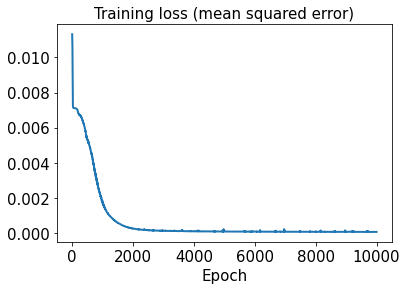

In [31]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

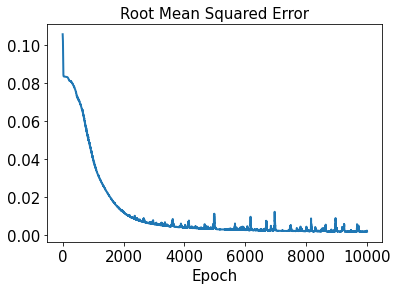

In [32]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [33]:
test_results = sd.evaluate(tsr_theta_train)

3/3 [==============================] - 0s 2ms/step - loss: 5.0246e-05 - rmse: 0.0000e+00


In [34]:
decoded_train = sd.predict(tsr_theta_train)

In [35]:
decoded_test = sd.predict(tsr_theta_test)

In [36]:
error_train_abs = np.abs(decoded_train - y_train)

In [37]:
error_test_abs = np.abs(decoded_test - y_test)

In [38]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.0004472826


In [39]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

0.03690712


In [40]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
print(l2_error_train_list)

[0.00034859753, 0.00061584526, 0.00037711274, 0.00035102863, 0.0002607453, 0.0004937979, 0.00022157437, 0.00037104954, 0.00055734254, 0.00039637164, 0.00053475937, 0.00053137925, 0.00055560743, 0.0002497184, 0.00044486212, 0.0005533907, 0.00056783593, 0.0005128996, 0.00034291286, 0.00033494167, 0.0008318367, 0.00041368988, 0.00032959718, 0.0002790857, 0.00031918663, 0.00038775255, 0.0004171612, 0.00030005982, 0.000376133, 0.00044812178, 0.00031647005, 0.00034448065, 0.00030917057, 0.00054423773, 0.00049266353, 0.00041570424, 0.00034242778, 0.00048742467, 0.00056231086, 0.00062280206, 0.00046921158, 0.0002977408, 0.00040529147, 0.00021937517, 0.0012230795, 0.0003069698, 0.0006319216, 0.00035412662, 0.00068784377, 0.0002684561, 0.00035996817, 0.0004137205, 0.00024623907, 0.000622404, 0.00037011318, 0.0003913134, 0.0007220498, 0.0005410795, 0.0009165384, 0.0005401433, 0.00039723644, 0.00036982645, 0.00038101056, 0.00059201353, 0.00033455988, 0.00034187458, 0.00034421193, 0.00034851852, 0.

In [41]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
print(l2_error_test_list)

[0.012094208, 0.12521441, 0.012798437, 0.0520858, 0.0047576986, 0.08433467, 0.0024565947, 0.0030561304]


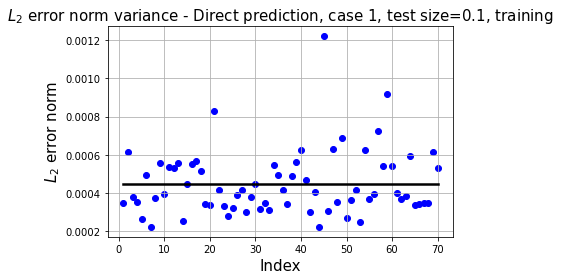

In [42]:
plt.plot(np.linspace(1, tsr_theta_train.shape[0], tsr_theta_train.shape[0]),
         l2_error_train*np.ones(x_train.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, tsr_theta_train.shape[0], tsr_theta_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Direct prediction, case 1, test size=0.1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

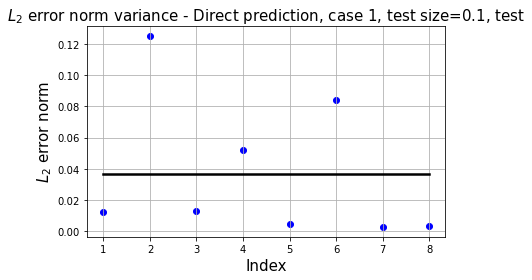

In [43]:
plt.plot(np.linspace(1, tsr_theta_test.shape[0], tsr_theta_test.shape[0]),
         l2_error_test*np.ones(tsr_theta_test.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], tsr_theta_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Direct prediction, case 1, test size=0.1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

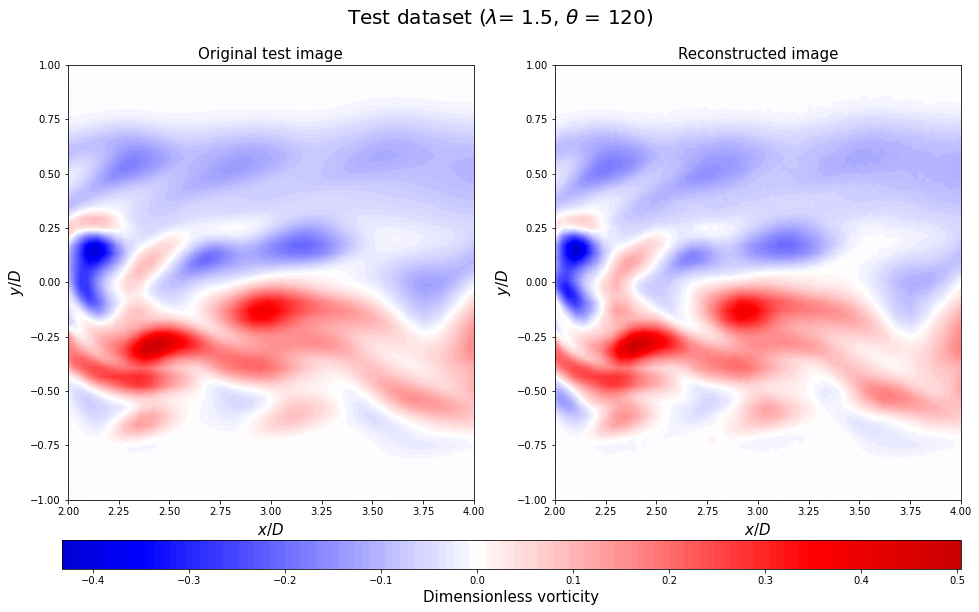

In [44]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

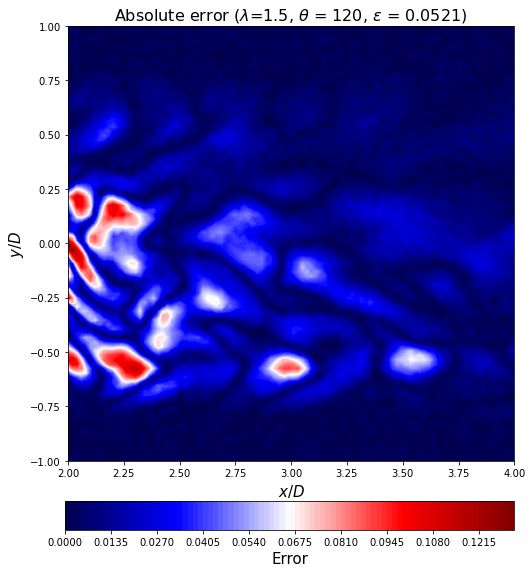

In [45]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()